## Обзор построителей классов данных

In [ ]:
class Coordinate:
    
    def __init__(self, lat, lon):
        self.lat = lan
        self.lot = lon

In [6]:
# поведение класса построенного с помощью namedtuple

from collections import namedtuple

Coordinate = namedtuple('Coordinate', 'lat lon')
print(issubclass(Coordinate, tuple))
moscow = Coordinate(55.756, 37.617)
print(moscow)
moscow == Coordinate(55.756, 37.617)

True
Coordinate(lat=55.756, lon=37.617)


True

In [7]:
# класс typing.NamedTuple

import typing
Coordinate = typing.NamedTuple('Coordinate',
        [('lat', float), ('lon', float)])

print(issubclass(Coordinate, tuple))
typing.get_type_hints(Coordinate)



True


{'lat': float, 'lon': float}

In [ ]:
# проще читается

Coordinate = typing.NamedTuple('Coordinate', lat=float, lon=float)


In [21]:
from typing import NamedTuple

class Coordinate(NamedTuple):
    lat: float
    lon: float
    
    def __str__(self):
        ns = 'N' if self.lat >= 0 else 'S'
        we = 'E' if self.lon >= 0 else 'W'
        return f'{abs(self.lat):^10.1f}{ns}, {abs(self.lon):^10.1f}{we}'
    
    
print(Coordinate(55.232, 15.345))

typing.get_type_hints(Coordinate)

   55.2   N,    15.3   E


{'lat': float, 'lon': float}

In [20]:
# с применением декоратора

from dataclasses import dataclass

@dataclass(frozen=True)
class Coordinate:
    lat: float
    lon: float
    
    def __str__(self):
        ns = 'N' if self.lat >= 0 else 'S'
        we = 'E' if self.lon >= 0 else 'W'
        return f'{abs(self.lat):1.f}{ns}, {abs(self.lon):.1f}{we}'

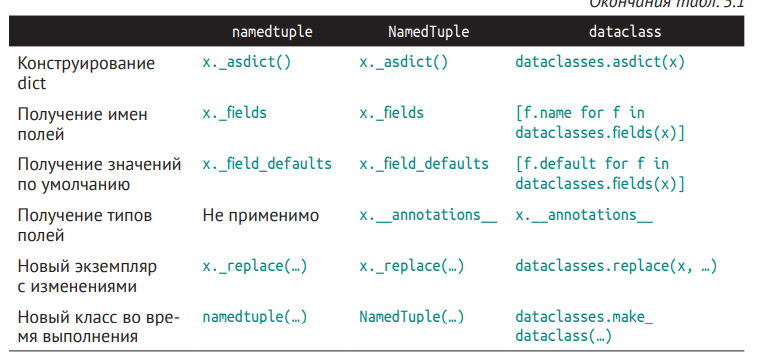

>Экземпляры остаются неизменяемыми, так как в namedtuple и NamedTuple используются кортежи.
В декораторе @dataclass за изменяемость отвечает аргумент frozen.

In [24]:
[f.default for f in dataclasses.fields(Coordinate)]

NameError: name 'dataclasses' is not defined

## Классические именованные кортежи

In [27]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates')
tokyo = City('Tokio', 'JP', 36.933, (25.689722, 139.691667))
tokyo[1]

'JP'

**Пример 5.5. Атрибуты и методы именованного кортежа (продолжение предыдущего примера)**

In [30]:
print(City._fields)
Coordinate = namedtuple('Coordinate', 'lin lon')
delhi_data = ('Delhi NCR', 'IN', 21.935, Coordinate(28.613889, 77.208889))
delhi = City._make(delhi_data)
print(delhi._asdict())

('name', 'country', 'population', 'coordinates')
{'name': 'Delhi NCR', 'country': 'IN', 'population': 21.935, 'coordinates': Coordinate(lin=28.613889, lon=77.208889)}


**Пример 5.6. Атрибуты и методы именованного кортежа (продолжение примера 5.5)**

In [32]:
Coordinate = namedtuple('Coordinate', 'lat lon reference', defaults=['WGS84'])
print(Coordinate(0,0))
print(Coordinate._field_defaults)

Coordinate(lat=0, lon=0, reference='WGS84')
{'reference': 'WGS84'}


**Вставка метода в класс,
созданный с помощью namedtuple**

***Пример 5.7. frenchdeck.doctest: добавление атрибута класса и метода в Card, именованный кортеж из примера «Колода карт на Python»***

In [36]:
import collections


Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2,11)] + list('JQKA')
    suits = 'spades diamonds clubs heart'.split()
    
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                      for rank in self.ranks]
        
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]

Card.suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)
def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    suit_value = card.suit_values[card.suit]
    return rank_value * len(card.suit_values) + suit_value

Card.overall_rank = spades_high
lowest_card = Card('2', 'clubs')
highest_card = Card('A', 'spades')


In [42]:
import collections

Card = namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                      for rank in self.ranks]
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]
    

Card.suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)

def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    suit_value = Card.suit_values[card.suit]
    
    return rank_value * len(Card.suit_values) + Card.suit_values[card.suit]

Card.overall_rank = spades_high
lower_high = Card('2', 'clubs')
lower_high.overall_rank()
random_high = Card('7', 'hearts')
random_high.overall_rank()

22

## Типизированные именованные кортежи

In [56]:
from typing import NamedTuple

class Coordinate(NamedTuple):
    lat: float
    lon: float
    reference: str = 'WGS84'
        
trash = Coordinate('Ni!', None)
print(trash)

print(Coordinate.__doc__)
print(Coordinate.__dict__)

Coordinate(lat='Ni!', lon=None, reference='WGS84')
Coordinate(lat, lon, reference)
{'__doc__': 'Coordinate(lat, lon, reference)', '__slots__': (), '_fields': ('lat', 'lon', 'reference'), '_field_defaults': {'reference': 'WGS84'}, '__new__': <staticmethod(<function Coordinate.__new__ at 0x7f6249789a20>)>, '_make': <classmethod(<function Coordinate._make at 0x7f624978a050>)>, '_replace': <function Coordinate._replace at 0x7f624978b7f0>, '__repr__': <function Coordinate.__repr__ at 0x7f624978ab00>, '_asdict': <function Coordinate._asdict at 0x7f62497896c0>, '__getnewargs__': <function Coordinate.__getnewargs__ at 0x7f62497888b0>, '__match_args__': ('lat', 'lon', 'reference'), 'lat': _tuplegetter(0, 'Alias for field number 0'), 'lon': _tuplegetter(1, 'Alias for field number 1'), 'reference': _tuplegetter(2, 'Alias for field number 2'), '__module__': '__main__', '__annotations__': {'lat': <class 'float'>, 'lon': <class 'float'>, 'reference': <class 'str'>}, '__orig_bases__': (<function Name

**Пример 5.10. meaning/demo_plain.py: простой класс с аннотациями типов**

In [57]:
class DemoPlainClass:
    a: int          # заводится запись, но атрибут не создается
    b: float = 1.1  # сохраняется в аннотациях, атрибут создается
    c = 'spam'      # просто атрибут
    
print(DemoPlainClass.__doc__)
print(DemoPlainClass.__annotations__)
print(DemoPlainClass.__dict__)
DemoPlainClass.c

None
{'a': <class 'int'>, 'b': <class 'float'>}
{'__module__': '__main__', '__annotations__': {'a': <class 'int'>, 'b': <class 'float'>}, 'b': 1.1, 'c': 'spam', '__dict__': <attribute '__dict__' of 'DemoPlainClass' objects>, '__weakref__': <attribute '__weakref__' of 'DemoPlainClass' objects>, '__doc__': None}


'spam'

## Инспекция typing.NamedTuple

In [51]:
import typing

class DemoNTClass(typing.NamedTuple):
    a: int             # создается и атрибут, и аннотация
    b: float = 1.1     
    c = 'spam'
    
    
print(DemoNTClass.__doc__)
nt = DemoNTClass(8)
print(nt.a)
print(nt.b)
print(nt.c)

# nt.a = 0
nt.b = 4
# nt.c = 5

DemoNTClass(a, b)
8
1.1
spam


AttributeError: can't set attribute

## Инспектирование класса с декоратором dataclass

In [73]:
from dataclasses import dataclass

@dataclass
class DemoDataClass:
    a: int          # заводится и аннотация, и создается атрибут
    b: float = 1.1
    d: float = 2.2
    c = 'spam'
    
print(DemoDataClass.__annotations__)
print(DemoDataClass.__doc__)
# # print(DemoDataClass.a)
# print(DemoDataClass.b)
# print(DemoDataClass.c)

dt = DemoDataClass(1)
dt.a = 2
dt.a
dt.b = 'oops'
dt.b

{'a': <class 'int'>, 'b': <class 'float'>, 'd': <class 'float'>}
DemoDataClass(a: int, b: float = 1.1, d: float = 2.2)


'oops'

**Пример 5.13. dataclass/club_wrong.py: этот класс возбуждает исключение ValueError**

In [74]:
@dataclass
class ClubMember:
    name: str
    guests: list = []

ValueError: mutable default <class 'list'> for field guests is not allowed: use default_factory

**Пример 5.14. dataclass/club.py: это определение ClubMember работает**

In [75]:
from dataclasses import dataclass, field

@dataclass
class ClubMember:
    name: str
    guests: list = field(default_factory=list)

**Пример 5.15. dataclass/club_generic.py: это определение ClubMember более точное**

In [76]:
from dataclasses import dataclass, field

@dataclass
class ClubMember:
    name: str
    guests: list[str] = field(default_factory=list)
        
# list[str] означает список объектов типа str



In [81]:
@dataclass
class ClassMember:
    name: str
    guests: list = field(default_factory=list)
    athlete: bool = field(default=False, repr=False)

NameError: name 'self' is not defined

## Постинициализация

In [79]:
"""
``HackerClubMember`` объект принимает необязательный аргумент ``handle``::
 >>> anna = HackerClubMember('Anna Ravenscroft', handle='AnnaRaven')
 >>> anna
 HackerClubMember(name='Anna Ravenscroft', guests=[], handle='AnnaRaven')
Если ``handle`` опущен, то берется первая часть имени члена::
 >>> leo = HackerClubMember('Leo Rochael')
 >>> leo
 HackerClubMember(name='Leo Rochael', guests=[], handle='Leo')
Члены должны иметь уникальный описатель. Следующий объект ``leo2`` не будет
создан потому, что его описатель ``handle`` был бы равен 'Leo', но этот описатель
уже сопоставлен ``leo``::
 >>> leo2 = HackerClubMember('Leo DaVinci')
 Traceback (most recent call last):
 ...
 ValueError: handle 'Leo' already exists.
Чтобы исправить эту ошибку, ``leo2`` необходимо создать с явным описателем::
 >>> leo2 = HackerClubMember('Leo Dainci', handle='Neo')
 >>> leo2
 HackerClubMember(name='Leo DaVinci', guests=[], handle='Neo')
"""

"\n``HackerClubMember`` объект принимает необязательный аргумент ``handle``::\n >>> anna = HackerClubMember('Anna Ravenscroft', handle='AnnaRaven')\n >>> anna\n HackerClubMember(name='Anna Ravenscroft', guests=[], handle='AnnaRaven')\nЕсли ``handle`` опущен, то берется первая часть имени члена::\n >>> leo = HackerClubMember('Leo Rochael')\n >>> leo\n HackerClubMember(name='Leo Rochael', guests=[], handle='Leo')\nЧлены должны иметь уникальный описатель. Следующий объект ``leo2`` не будет\nсоздан потому, что его описатель ``handle`` был бы равен 'Leo', но этот описатель\nуже сопоставлен ``leo``::\n >>> leo2 = HackerClubMember('Leo DaVinci')\n Traceback (most recent call last):\n ...\n ValueError: handle 'Leo' already exists.\nЧтобы исправить эту ошибку, ``leo2`` необходимо создать с явным описателем::\n >>> leo2 = HackerClubMember('Leo Dainci', handle='Neo')\n >>> leo2\n HackerClubMember(name='Leo DaVinci', guests=[], handle='Neo')\n"

In [80]:
from dataclasses import dataclass
from club import ClubMember

@dataclass
class HackerClubMember(ClubMember):
    all_handles = set()
    handle: str = ''
    
    def __post_init__(self):
        cls = self.__class__
        if self.handle == '':
            self.handle = self.name.split()[0]
        if self.handle in cls.all_handles:
            msg = f'handle {self.handle!r} already exists.'
            raise ValueError(msg)
        cls.all_handles.add(self.handle)

ModuleNotFoundError: No module named 'club'

In [ ]:
@dataclass
class HackerClubMember(ClubMember):
    all_handles = set()
    handle: str = ''
    
    def __post_init__(self):
        cls = self.__class__
        if self.handle = '':
            self.handle = self.name.split()[0]
        if self.handle in cls.all_handles:
            msg = f'This handler {self.handle!r} already exists'
            raise ValueError(msg)
        cls.all_handles.add(self.handle)

In [ ]:
@dataclass
class HackerClubMember(ClubMember):
    all_handles: ClassVar[set[str]] = set()
    handle: str = ''
    
    def __post_init__(self):
        cls = self.__class__
        if self.handle = '':
            self.handle = self.name.split()[0]
        if self.handle in cls.all_handles:
            msg = f'This handler {self.handle!r} already exists'
            raise ValueError(msg)
        cls.all_handles.add(self.handle)

## Инициализируемые переменные, не являющиеся полями

**Пример 5.18. Пример из документации по модулю dataclasses**

In [83]:
from typing import InitVar

@dataclass
class C:
    i: int
    j: int = None
    database: InitVar[DatabaseType] = None
        
    def __post_init__(self, database):
        if self.j is None and database is not None:
            self.j = database.lookup('j')
            
c = C(10, database=my_database)

ImportError: cannot import name 'InitVar' from 'typing' (/usr/lib/python3.10/typing.py)

## Пример использования @dataclass: запись о ресурсе
## из дублинского ядра

**Пример 5.19. dataclass/resource.py: код класса Resource, основанного на схеме дублинского ядра**

In [93]:
from dataclasses import dataclass, field
from typing import Optional
from enum import Enum, auto
from datetime import date

class ResourseType(Enum):
    BOOK = auto()
    EBOOK = auto()
    VIDEO = auto()
    
@dataclass
class Resource:
    """ Описание мультимедийного ресурса."""
    identtifier: str
    title: str = '<untitled>'
    creators: list[str] = field(default_factory=list)
    date: Optional[date] = None
    type: ResourseType = ResourseType.BOOK
    description: str = ''
    language: str = ''
    subjects: list[str] = field(default_factory=list)
        
    def __repr__(self):
        cls = self.__class__
        cls_name = cls.__name__
        indent = ' ' * 4
        res = [f'{cls_name}(']
        for f in fields(cls):
            value = getattr(self, f.name)
            res.append(f'{indent}{f.name} = {value!r},')
        res.append(')')
        return '\n'.join(res)
    
    def __repr__(self):
        cls = self.__class__
        cls_name = cls.__name__
        indent = ' ' * 4
        res = [f'{cls_name}(']
        for f in fields(cls):
            value = getattr(self, f.name)
            res.append(f'{indent}{f.name} = {value!r},')
        res.append(')')
        return '\n'.join(res)

**Пример 5.20. Тест класса Resource**

In [92]:
description = 'Improving the design of existing code'
book = Resource('978-0-13-475759-9', 'Refactoring, 2 Edition',
               ['Martin Fowler', 'Kent Beck'], date(2018, 11, 19),
               ResourseType.BOOK, description, 'EN', 
               ['computer programming', 'OOP'])
book # doctest: +NORMALIZE_WHITESPACE



Resource(identtifier='978-0-13-475759-9', title='Refactoring, 2 Edition', creators=['Martin Fowler', 'Kent Beck'], date=datetime.date(2018, 11, 19), type=<ResourseType.BOOK: 1>, description='Improving the design of existing code', language='EN', subjects=['computer programming', 'OOP'])

In [101]:
class MyClass:
    def __init__(self, arg1, arg2, arg3):
        l = locals()
        print(l)
        del l['self']
        print(l)
        for name in l:
            setattr(self, name, l[name])
        
myClass = MyClass(1, 2, 3)       

myClass.arg1

{'self': <__main__.MyClass object at 0x7f6248eba5f0>, 'arg1': 1, 'arg2': 2, 'arg3': 3}
{'arg1': 1, 'arg2': 2, 'arg3': 3}


1